**Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
df[df["isFlaggedFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
df[(df["isFraud"]==1) & (df["type"]=="PAYMENT")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df[(df["type"]=="PAYMENT") & (df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df[(df["type"]=="DEBIT") & (df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df[(df["type"]=="CASH_IN") & (df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df[(df['nameDest'].str.startswith('M'))]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [ ]:
df[(df['nameDest'].str.startswith('M')) & (df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df[df['nameOrig'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()/100

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,63626.200000,63626.200000,63626.200000,63626.200000,6.362620e+04,6.362620e+04,63626.200000,6.362620e+04
mean,2.433972,1798.619035,8338.831041,8551.136686,1.100702e+04,1.224996e+04,0.000013,2.514687e-08
std,1.423320,6038.582315,28882.426730,29240.485030,3.399180e+04,3.674129e+04,0.000359,1.585775e-05
min,0.010000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.560000,133.895700,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,2.390000,748.719400,142.080000,0.000000,1.327057e+03,2.146614e+03,0.000000,0.000000e+00
75%,3.350000,2087.214775,1073.151750,1442.584100,9.430367e+03,1.111909e+04,0.000000,0.000000e+00
max,7.430000,924455.166400,595850.403700,495850.403700,3.560159e+06,3.561793e+06,0.010000,1.000000e-02


 **Based on the observation that if the recipient of a transaction has a name that starts with "M" (i.e., a merchant), then it is not a fraud transaction also fraud occurs only when the transaction is Transfer or Cash out from the given dataset. Hence we can ignore such transactions for the purpose of detecting fraud.**

In [ ]:
df=df[~((df['nameDest'].str.startswith('M')) | (df["type"]=="DEBIT") | (df["type"]=="CASH_IN"))]

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


**Encoding the categorical varibale using one hot encoding**

In [ ]:
df=pd.get_dummies(df,columns=["type"],drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
2,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1
3,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,0
15,1,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,0
19,1,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,1
24,1,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0
6362618,743,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,1


**Feature Selection:**

<ipython-input-12-15470f00610f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=0.5)


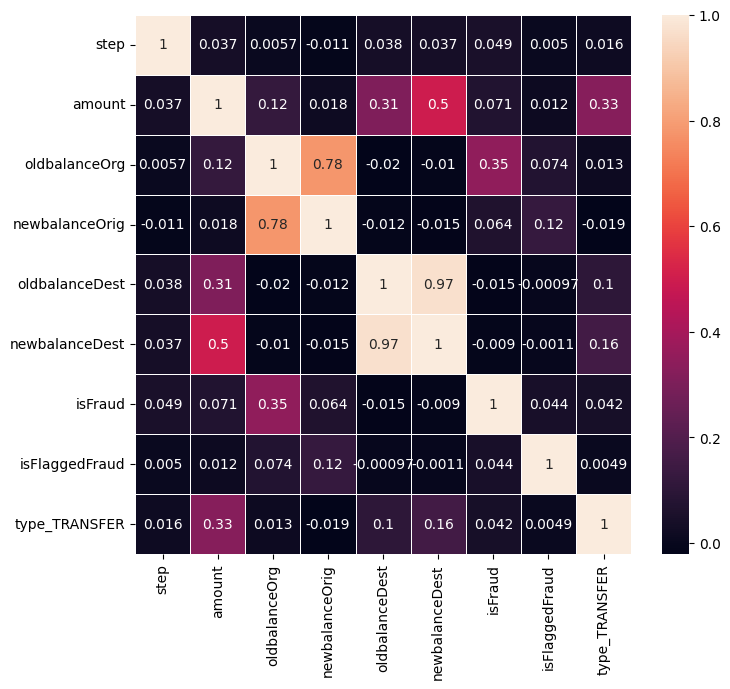

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [ ]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_TRANSFER'],
      dtype='object')

**The correlation table shows that there is multicollinearity between 
'oldbalanceOrg' and 'newbalanceOrig', as well as between 'oldbalanceDest' and 'newbalanceDest'. Therefore, we will select the 'oldbalanceOrg' feature and drop the 'newbalanceOrig' feature**

**Similarly, we will drop both the 'oldbalanceDest' and 'newbalanceDest' features due to multicollinearity and negative correlation.**
 
**Additionally, we will also drop the 'name' feature, as it contains millions of unique values and is unlikely to be helpful in detecting fraudulent transactions.**

In [ ]:
df=df.drop(['nameOrig','nameDest','oldbalanceDest','newbalanceOrig', 'newbalanceDest'],axis=True)
df

,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_TRANSFER
2,1,181.00,181.00,1,0,1
3,1,181.00,181.00,1,0,0
15,1,229133.94,15325.00,0,0,0
19,1,215310.30,705.00,0,0,1
24,1,311685.89,10835.00,0,0,1
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,1,0,0
6362616,743,6311409.28,6311409.28,1,0,1
6362617,743,6311409.28,6311409.28,1,0,0
6362618,743,850002.52,850002.52,1,0,1


In [ ]:
df1=df[df["isFraud"]==1]
len(df1)

8213

**Since the dataset is huge and very mininal amount of one class taking same number of sample from other class.**

In [ ]:
from random import sample
df2=df.sample(n=8300,replace=False,ignore_index=True)
len(df2)

8300

In [ ]:
d=pd.concat([df1,df2],axis=0,ignore_index=True)
d

,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_TRANSFER
0,1,181.00,181.0,1,0,1
1,1,181.00,181.0,1,0,0
2,1,2806.00,2806.0,1,0,1
3,1,2806.00,2806.0,1,0,0
4,1,20128.00,20128.0,1,0,1
...,...,...,...,...,...,...
16508,324,249492.01,0.0,0,0,0
16509,236,562261.97,0.0,0,0,1
16510,285,80240.36,0.0,0,0,0
16511,565,281122.01,0.0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [ ]:
x=d.drop(["isFraud"],axis=1)
y=d["isFraud"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

**Tarining the dataset with multiple models with pipeline**

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression())])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier())])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier())])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm.SVC(probability=True))])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier())])

In [ ]:
lr_param_grid = [{'LR__penalty': ['l2','l1'],'LR__C':[1.0,1.5,2.0]}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],'DT__max_depth': [3,4,5,6,7,8,9,10]}]
rf_param_grid = [{'RF__criterion':['gini','entropy'],'RF__n_estimators':[10,15,20,25]}]
knn_param_grid = [{'KNN__n_neighbors':[5,6,7,8,9,10],'KNN__weights': ['uniform', 'distance'],'KNN__metric': ['euclidean','minkowski']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C':[1,2,3,4,5,6]}]
xgb_param_grid = [{'XGB__learning_rate': [0.1,0.2,0.3,0.5,0.6,0.8,1.0],'XGB__max_depth':[3,4,5,6]}]
cv=StratifiedKFold(n_splits=3)

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=cv)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='roc_auc',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=cv)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='roc_auc',
        cv=cv)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='roc_auc',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='roc_auc',
        cv=cv)

In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],model.score(x_test,y_test)))
    y_pred=model.predict(x_test)
    print("AUROC:",roc_auc_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

Logistic Regression Test Accuracy: 0.9566774190946402
AUROC: 0.8912708079280031
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1654
           1       0.91      0.86      0.89      1649

    accuracy                           0.89      3303
   macro avg       0.89      0.89      0.89      3303
weighted avg       0.89      0.89      0.89      3303

Decision Trees Test Accuracy: 0.9876512678894469
AUROC: 0.9633853429178799
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1654
           1       0.95      0.98      0.96      1649

    accuracy                           0.96      3303
   macro avg       0.96      0.96      0.96      3303
weighted avg       0.96      0.96      0.96      3303

Random Forest Test Accuracy: 0.9957616026128473
AUROC: 0.9812428917016139
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1654
        

**From the above scores XGboost classifiers gives the best result.

**4. Demonstrate the performance of the model by using best set of tools.**

In [ ]:
xgb_grid_search.best_params_

{'XGB__learning_rate': 0.5, 'XGB__max_depth': 4}

In [ ]:
xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(learning_rate=0.5,max_depth=4))])

In [ ]:
xgb.fit(x_train,y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
xgb.score(x_test,y_test)

0.9854677565849228

In [ ]:
y_pred=xgb.predict(x_test)
print("AUROC:",roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

AUROC: 0.985487447533064
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1656
           1       0.98      0.99      0.99      1647

    accuracy                           0.99      3303
   macro avg       0.99      0.99      0.99      3303
weighted avg       0.99      0.99      0.99      3303



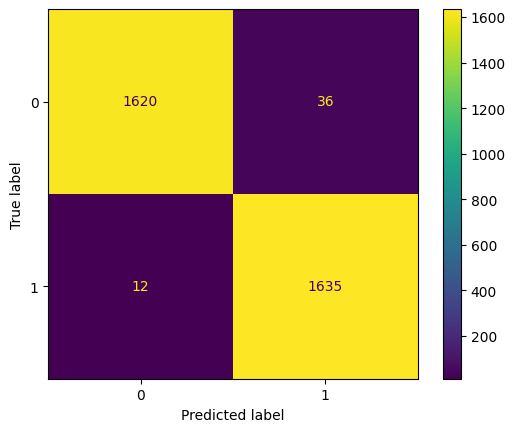

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, x_test, y_test)

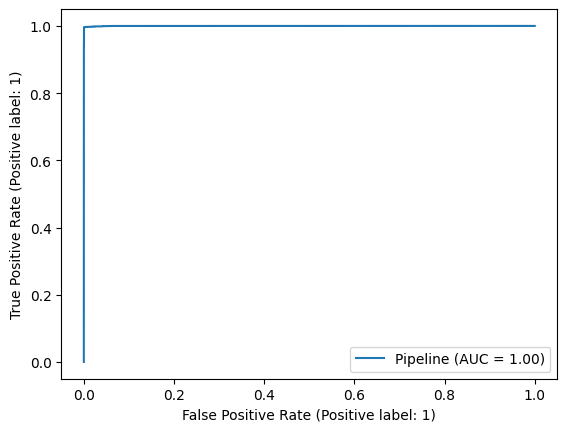

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb,x_train,y_train)

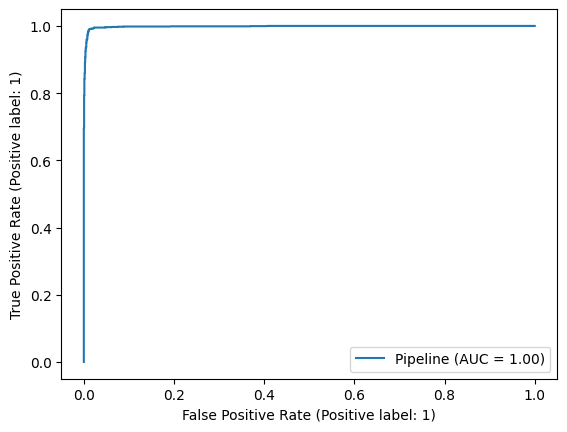

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb,x_test,y_test)

In [ ]:
imp = pd.DataFrame(list(zip(xgb.named_steps['XGB'].feature_importances_, df.drop("isFraud", axis=1))),
                   columns=["Importance", "Feature"])
imp.sort_values("Importance", ascending=False, inplace=True, ignore_index=True)
imp

,Importance,Feature
0,0.461383,oldbalanceOrg
1,0.271693,type_TRANSFER
2,0.210916,amount
3,0.056008,step
4,0.000000,isFlaggedFraud


**From feature importance it is very clear the feature "oldbalanceOrg","type_TRANSFER","amount" alone give the better results.**

**2. Describe your fraud detection model in elaboration.**
1.   XGBoost is designed to handle large datasets with millions of rows.Includes built-in regularization techniques such as L1, L2, and dropout to prevent overfitting and improve generalization performance.
2.   XGBoost provides a feature importance score that can be used to identify the most important features in the dataset




**3. How did you select variables to be included in the model?**



*   The correlation table shows that there is multicollinearity between 'oldbalanceOrg' and 'newbalanceOrig', as well as between 'oldbalanceDest' and 'newbalanceDest'. Therefore, we will select the 'oldbalanceOrg' feature and drop the 'newbalanceOrig' feature
*   Similarly, we will drop both the 'oldbalanceDest' and 'newbalanceDest' features due to multicollinearity and negative correlation.
*   Additionally, we will also drop the 'name' feature, as it contains millions of unique values and is unlikely to be helpful in detecting fraudulent transactions.
*  From feature importance it is very clear the feature "oldbalanceOrg","type_TRANSFER","amount" alone give the better results 

**5. What are the key factors that predict fraudulent customer?**


*   abnormal transaction like high amount transfer
*   transaction history of customer
*   Mode of transfer,the timezone,device using for transaction
*   Rapid credit and debit of amounts.

**7. What kind of prevention should be adopted while company update its infrastructure?**

*   well structured security and access controls
*   conducting security tests at intervals
*   Highly updated software tools to access the customer details
*   Conducting security awareness training for employees
*   keep customer details and transaction details securely and keep backup.


**8. Assuming these actions have been implemented, how would you determine if they work?**


*   Checking the security at intervals and analyzing if something happens what would be the response and have the plan ready
*   Get feedback from the customers.

